In [34]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.metrics import log_loss,confusion_matrix

In [35]:
raw_train_data = pd.read_csv("D:\\train.csv")
raw_test_data = pd.read_csv("D:\\test.csv")

In [36]:
print(raw_train_data.shape)
print(raw_test_data.shape)

(61878, 95)
(144368, 94)


In [37]:
Train_data = raw_train_data.iloc[:, 1:95]
labels = set(Train_data.iloc[:,93:94].target)
Valid_x = np.array(raw_test_data.iloc[:, 1:94])
Total_x = np.array(Train_data.iloc[:,0:93])
Total_y = np.array(Train_data.iloc[:,93:94])

In [38]:
print(f"The current has the following label {labels}")
print(f"The shape the Total_X {Total_x.shape}")
print(f"The shape the Total_Y {Total_y.shape}")
print(f"The shape the Valid_X {Valid_x.shape}")
print(f"Check Nan in Total_X {set(np.isnan(Total_x).any(axis=1))}")
# print(f"Check Nan in Train_Y {np.isnan(Train_Y).any(axis=1)}")
print(f"Check Nan in Valid_X {set(np.isnan(Valid_x).any(axis=1))}")

The current has the following label {'Class_1', 'Class_7', 'Class_3', 'Class_2', 'Class_6', 'Class_5', 'Class_8', 'Class_4', 'Class_9'}
The shape the Total_X (61878, 93)
The shape the Total_Y (61878, 1)
The shape the Valid_X (144368, 93)
Check Nan in Total_X {False}
Check Nan in Valid_X {False}


In [39]:
# np.random.seed(10)
Total_X,Total_Y = shuffle(Total_x,Total_y)

In [40]:
# In this part using the previous 50000 to do the training and the last data to do the test check the score
Train_X = Total_X[:50000]
Train_Y = Total_Y[:50000]
Test_X = Total_X[50000:]
Test_Y = Total_Y[50000:]
print(Train_X.shape)
print(Train_Y.shape)
print(Test_X.shape)
print(Test_Y.shape)

(50000, 93)
(50000, 1)
(11878, 93)
(11878, 1)


In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
GNB_model = GaussianNB()
MNB_model = MultinomialNB()
BNB_model = BernoulliNB()
GNB_model.fit(Train_X, Train_Y.ravel())
MNB_model.fit(Train_X, Train_Y.ravel())
BNB_model.fit(Train_X, Train_Y.ravel())

BernoulliNB()

In [42]:
print(Test_X.shape)

(11878, 93)


In [43]:
Y_pred_GNB = GNB_model.predict(Test_X)
Y_pred_proba_GNB = GNB_model.predict_proba(Test_X)
Y_pred_MNB = MNB_model.predict(Test_X)
Y_pred_MNB_proba = MNB_model.predict_proba(Test_X)
Y_pred_BNB = BNB_model.predict(Test_X)
Y_pred_BNB_proba = BNB_model.predict_proba(Test_X)

In [44]:
print(Y_pred_GNB)
print(Y_pred_MNB)
print(Y_pred_BNB)

['Class_9' 'Class_9' 'Class_2' ... 'Class_3' 'Class_2' 'Class_4']
['Class_9' 'Class_8' 'Class_2' ... 'Class_8' 'Class_2' 'Class_4']
['Class_9' 'Class_1' 'Class_2' ... 'Class_1' 'Class_2' 'Class_2']


In [45]:
normal_GNB_report = metrics.classification_report(Test_Y,Y_pred_GNB)
log_loss_result_GNB = log_loss(Test_Y, Y_pred_proba_GNB)
normal_MNB_report = metrics.classification_report(Test_Y,Y_pred_MNB)
log_loss_result_MNB = log_loss(Test_Y, Y_pred_MNB_proba)
normal_BNB_report = metrics.classification_report(Test_Y,Y_pred_BNB)
log_loss_result_BNB = log_loss(Test_Y, Y_pred_BNB_proba)

In [46]:
print(normal_GNB_report)
print(log_loss_result_GNB)
print(normal_MNB_report)
print(log_loss_result_MNB)
print(normal_BNB_report)
print(log_loss_result_BNB)

              precision    recall  f1-score   support

     Class_1       0.23      0.33      0.27       383
     Class_2       0.67      0.64      0.65      3184
     Class_3       0.47      0.28      0.35      1500
     Class_4       0.22      0.52      0.31       543
     Class_5       0.44      0.93      0.59       495
     Class_6       0.95      0.78      0.85      2703
     Class_7       0.41      0.50      0.45       492
     Class_8       0.91      0.54      0.68      1615
     Class_9       0.60      0.78      0.68       963

    accuracy                           0.61     11878
   macro avg       0.54      0.59      0.54     11878
weighted avg       0.68      0.61      0.63     11878

7.277258581501607
              precision    recall  f1-score   support

     Class_1       0.26      0.54      0.35       383
     Class_2       0.73      0.65      0.69      3184
     Class_3       0.40      0.29      0.34      1500
     Class_4       0.24      0.61      0.34       543
     C

In [47]:
checking_test_label={"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
Test_GNB_counter={"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
Test_MNB_counter={"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
Test_BNB_counter={"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}

In [48]:
print(Y_pred_GNB)

['Class_9' 'Class_9' 'Class_2' ... 'Class_3' 'Class_2' 'Class_4']


In [49]:
for item in Test_Y:
    checking_test_label[item[-1]] += 1
print(checking_test_label)

for item in Y_pred_GNB:
    Test_GNB_counter[item] += 1
print(Test_GNB_counter)

for item in Y_pred_MNB:
    Test_MNB_counter[item] += 1
print(Test_MNB_counter)

for item in Y_pred_BNB:
    Test_BNB_counter[item] += 1
print(Test_BNB_counter)

{'Class_1': 383, 'Class_2': 3184, 'Class_3': 1500, 'Class_4': 543, 'Class_5': 495, 'Class_6': 2703, 'Class_7': 492, 'Class_8': 1615, 'Class_9': 963}
{'Class_1': 548, 'Class_2': 3040, 'Class_3': 890, 'Class_4': 1317, 'Class_5': 1059, 'Class_6': 2216, 'Class_7': 596, 'Class_8': 966, 'Class_9': 1246}
{'Class_1': 786, 'Class_2': 2823, 'Class_3': 1066, 'Class_4': 1388, 'Class_5': 536, 'Class_6': 2417, 'Class_7': 510, 'Class_8': 1219, 'Class_9': 1133}
{'Class_1': 540, 'Class_2': 3799, 'Class_3': 946, 'Class_4': 483, 'Class_5': 719, 'Class_6': 2307, 'Class_7': 619, 'Class_8': 1396, 'Class_9': 1069}


In [50]:
import matplotlib.pyplot as plt

In [51]:
GNB_model = GaussianNB()
MNB_model = MultinomialNB()
BNB_model = BernoulliNB()

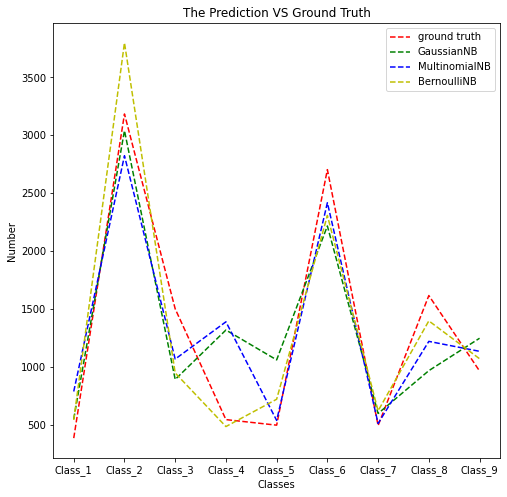

In [52]:
plt.figure(figsize=(8, 8))
l1=plt.plot(checking_test_label.keys(),checking_test_label.values(),'r--',label='ground truth')
l2=plt.plot(Test_GNB_counter.keys(),Test_GNB_counter.values(),'g--',label='GaussianNB')
l3=plt.plot(Test_MNB_counter.keys(),Test_MNB_counter.values(),'b--',label='MultinomialNB')
l4=plt.plot(Test_BNB_counter.keys(),Test_BNB_counter.values(),'y--',label='BernoulliNB')

plt.title('The Prediction VS Ground Truth')
plt.xlabel('Classes')
plt.ylabel('Number')
plt.legend()
plt.show()

In [53]:
confusion_GNB = confusion_matrix(Y_pred_GNB, Test_Y)
confusion_MNB = confusion_matrix(Y_pred_MNB, Test_Y)
confusion_BNB = confusion_matrix(Y_pred_BNB, Test_Y)


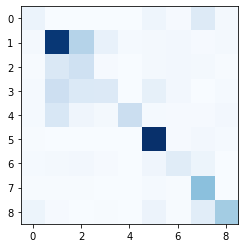

In [54]:
plt.imshow(confusion_GNB, cmap=plt.cm.Blues)

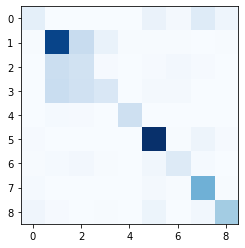

In [55]:
plt.imshow(confusion_MNB, cmap=plt.cm.Blues)


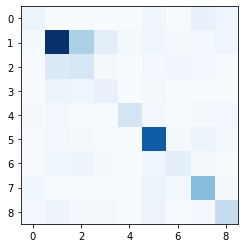

In [56]:
plt.imshow(confusion_BNB, cmap=plt.cm.Blues)

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
Test_Y_num = np.array([np.array(int(i[-1])) for item in Test_Y for i in item])
print(Test_Y_num)

[9 8 2 ... 8 2 2]


In [59]:
GNB_model_Ada = AdaBoostClassifier(GaussianNB())
MNB_model_Ada = AdaBoostClassifier(MultinomialNB())
BNB_model_Ada = AdaBoostClassifier(BernoulliNB())
GNB_model_Ada.fit(Train_X, Train_Y.ravel())
MNB_model_Ada.fit(Train_X, Train_Y.ravel())
BNB_model_Ada.fit(Train_X, Train_Y.ravel())

AdaBoostClassifier(base_estimator=BernoulliNB())

In [60]:
Y_pred_GNB_Ada = GNB_model_Ada.predict(Test_X)
Y_pred_proba_GNB_Ada = GNB_model_Ada.predict_proba(Test_X)
Y_pred_MNB_Ada = MNB_model_Ada.predict(Test_X)
Y_pred_MNB_proba_Ada = MNB_model_Ada.predict_proba(Test_X)
Y_pred_BNB_Ada = BNB_model_Ada.predict(Test_X)
Y_pred_BNB_proba_Ada = BNB_model_Ada.predict_proba(Test_X)

In [61]:
normal_GNB_report_Ada = metrics.classification_report(Test_Y,Y_pred_GNB_Ada)
log_loss_result_GNB_Ada = log_loss(Test_Y, Y_pred_proba_GNB_Ada)
normal_MNB_report_Ada = metrics.classification_report(Test_Y,Y_pred_MNB_Ada)
log_loss_result_MNB_Ada = log_loss(Test_Y, Y_pred_MNB_proba_Ada)
normal_BNB_report_Ada = metrics.classification_report(Test_Y,Y_pred_BNB_Ada)
log_loss_result_BNB_Ada = log_loss(Test_Y, Y_pred_BNB_proba_Ada)

E:\Anaconda\envs\tf24\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\envs\tf24\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\envs\tf24\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
print(normal_GNB_report_Ada)
print(log_loss_result_GNB_Ada)
print(normal_MNB_report_Ada)
print(log_loss_result_MNB_Ada)
print(normal_BNB_report_Ada)
print(log_loss_result_BNB_Ada)

              precision    recall  f1-score   support

     Class_1       0.17      0.33      0.22       383
     Class_2       0.60      0.31      0.41      3184
     Class_3       0.26      0.54      0.35      1500
     Class_4       0.17      0.27      0.21       543
     Class_5       0.88      0.83      0.85       495
     Class_6       0.75      0.74      0.75      2703
     Class_7       0.28      0.39      0.32       492
     Class_8       0.74      0.54      0.62      1615
     Class_9       0.66      0.39      0.49       963

    accuracy                           0.50     11878
   macro avg       0.50      0.48      0.47     11878
weighted avg       0.58      0.50      0.51     11878

              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00       383
     Class_2       0.00      0.00      0.00      3184
     Class_3       0.00      0.00      0.00      1500
     Class_4       0.00      0.00      0.00       543
     Class_5       0.00 